In [3]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
conn = sqlite3.connect('SLSN.db', detect_types=sqlite3.PARSE_DECLTYPES|sqlite3.PARSE_COLNAMES)
cur = conn.cursor()

In [5]:
query = """
SELECT * FROM four_ops WHERE run_id=6 AND pass=1 and t0=0
"""
cur.execute(query)
df = pd.DataFrame(cur.fetchall(), columns=np.array(cur.description)[:,0])
df_plot = df.drop(["RUN_ID", "in_A", "in_B", "in_C", "in_D", "pass"], axis=1)

In [18]:
df.shape

(87885, 19)

In [6]:
query = """
SELECT * FROM four_ops WHERE run_id=6 and pass=1 and t0=0.0 and dM_400_p30 < 2.5
"""
cur.execute(query)
df_15 = pd.DataFrame(cur.fetchall(), columns=np.array(cur.description)[:,0])

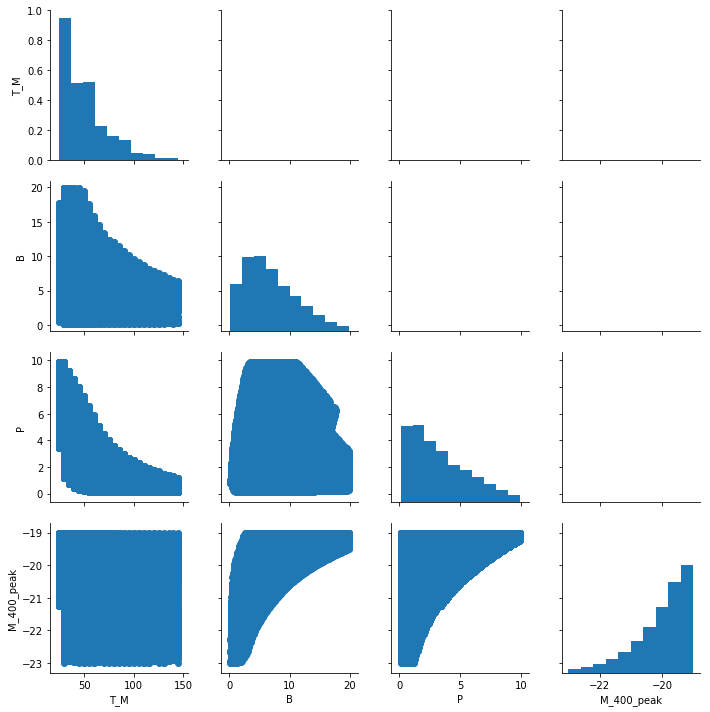

In [15]:
g = sns.PairGrid(df[["T_M", "B", "P", "M_400_peak"]])
g = g.map_diag(plt.hist)
g = g.map_lower(plt.scatter)
# g = g.map_upper(sns.kdeplot)

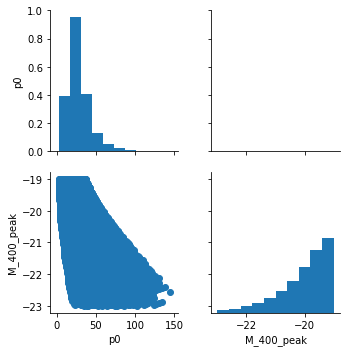

In [20]:
g = sns.PairGrid(df[["p0", "M_400_peak"]])
g = g.map_diag(plt.hist)
g = g.map_lower(plt.scatter)
# g = g.map_upper(sns.kdeplot)

In [8]:
# g = sns.PairGrid(df[["M_400_peak", "C_peak", "dM_400_p30", "C_p30"]])
# g = g.map_diag(plt.hist)
# g = g.map_offdiag(sns.kdeplot)

In [9]:
p = dict()
# p["A"] = [-22.62, 0.75, 0.32]
# p["B"] = [-22.02, 1.14, 0.29]
# p["C"] = [-0.30, 0.16, 0.14]
# p["D"] = [-0.22, 0.35, 0.08]

p["A"] = [-21.62, 0.75, 0.62]
p["B"] = [-21.02, 1.14, 0.59]
p["C"] = [-0.30, 0.16, 0.14]
p["D"] = [-0.22, 0.35, 0.08]

def line(x, p):
    return p[0] + p[1] * x

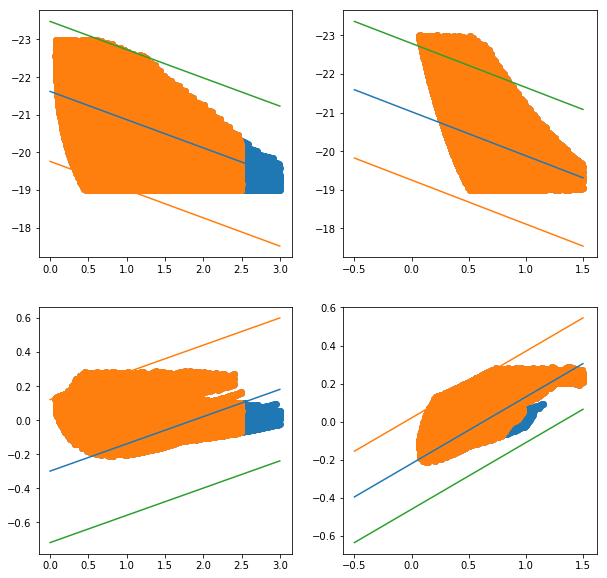

In [10]:
fig, ax = plt.subplots(2,2, figsize=(10, 10))

ax[0, 0].scatter(df["dM_400_p30"], df["M_400_peak"])
ax[1, 0].scatter(df["dM_400_p30"], df["C_peak"])
ax[0, 1].scatter(df["C_p30"], df["M_400_peak"])
ax[1, 1].scatter(df["C_p30"], df["C_peak"])

ax[0, 0].scatter(df_15["dM_400_p30"], df_15["M_400_peak"])
ax[1, 0].scatter(df_15["dM_400_p30"], df_15["C_peak"])
ax[0, 1].scatter(df_15["C_p30"], df_15["M_400_peak"])
ax[1, 1].scatter(df_15["C_p30"], df_15["C_peak"])

x = np.linspace(0, 3, 1000)
y = line(x, p["A"])
ax[0, 0].plot(x, y)
ax[0, 0].plot(x, y + 3*p["A"][2])
ax[0, 0].plot(x, y - 3*p["A"][2])
ax[0, 0].invert_yaxis()

y = line(x, p["C"])
ax[1, 0].plot(x, y)
ax[1, 0].plot(x, y + 3*p["C"][2])
ax[1, 0].plot(x, y - 3*p["C"][2])

x = np.linspace(-0.5, 1.5, 1000)
y = line(x, p["B"])
ax[0, 1].plot(x, y)
ax[0, 1].plot(x, y + 3*p["B"][2])
ax[0, 1].plot(x, y - 3*p["B"][2])
ax[0, 1].invert_yaxis()

y = line(x, p["D"])
ax[1, 1].plot(x, y)
ax[1, 1].plot(x, y + 3*p["D"][2])
ax[1, 1].plot(x, y - 3*p["D"][2])

plt.savefig('4ops.png', bbox_inches='tight')

In [17]:
conn.close()